In [96]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd


In [97]:
# Load the dataset
wine_data = load_wine()
X = wine_data.data
y = wine_data.target
X.shape, y.shape

((178, 13), (178,))

In [98]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
# Normalize the dataset for KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [101]:
# Define a range of k values to test
k_values = range(1, 21)
accuracies = []

# Train KNN for different k values and evaluate accuracy
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Create a DataFrame to visualize the accuracy results
results_df = pd.DataFrame({'k': k_values, 'Accuracy': accuracies})
results_df.head()

,k,Accuracy
0,1,0.944444
1,2,0.944444
2,3,0.944444
3,4,0.944444
4,5,0.944444


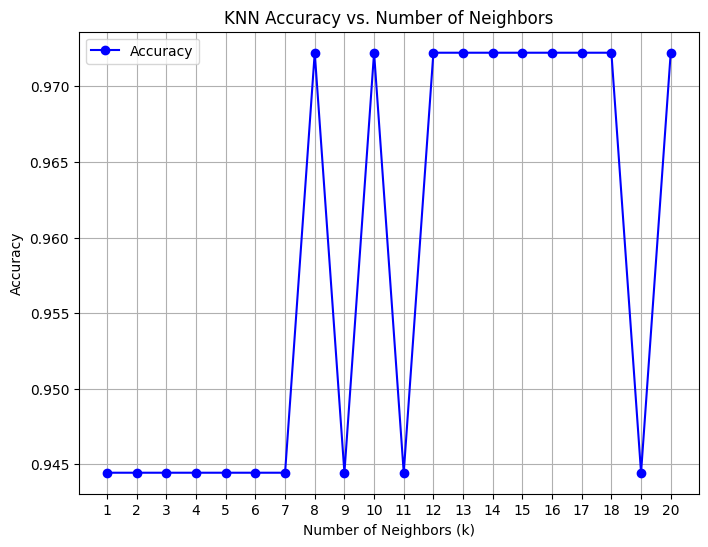

In [102]:
# Plot the accuracy as a function of k
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

In [104]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score

print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred, average='macro'))
print('precision:', precision_score(y_test, y_pred, average='macro'))
print('f1 :', f1_score(y_test, y_pred, average='macro'))

accuracy: 0.9722222222222222
recall: 0.9761904761904763
precision: 0.9777777777777779
f1 : 0.9761600681140911
